<a href="https://colab.research.google.com/github/Hiteshkumar231801059/AD23532_PODS/blob/main/exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
5import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data="Titanic-Dataset.csv"
df=pd.read_csv(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])


In [ ]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

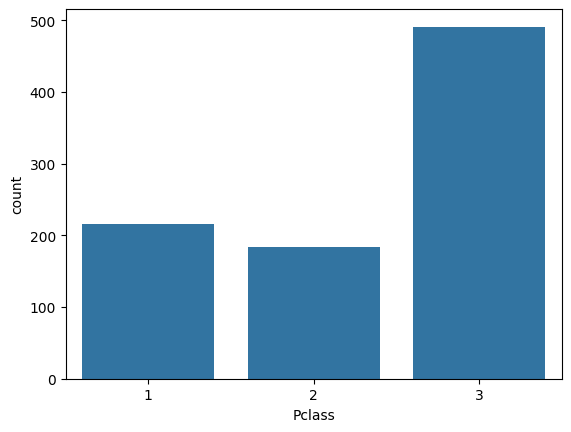

In [ ]:
sns.countplot(x='Pclass', data=df)
plt.show()

In [ ]:
female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Name']
print("Female passengers who survived:\n", female_survived.to_list())

Female passengers who survived:
 ['Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'Nasser, Mrs. Nicholas (Adele Achem)', 'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth', 'Hewlett, Mrs. (Mary D Kingcome) ', 'Masselmani, Mrs. Fatima', 'McGowan, Miss. Anna "Annie"', 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)', 'O\'Dwyer, Miss. Ellen "Nellie"', 'Spencer, Mrs. William Augustus (Marie Eugenie)', 'Glynn, Miss. Mary Agatha', 'Nicola-Yarred, Miss. Jamila', 'Laroche, Miss. Simonne Marie Anne Andree', 'Devaney, Miss. Margaret Delia', "O'Driscoll, Miss. Bridget", 'Harper, Mrs. Henry Sleeper (Myna Haxtun)', 'Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)', 'Rugg, Miss. Emily', 'West, Miss. Constance Mirium', 'Icard, Miss. Amelie', 'Nye, Mrs. (Elizabeth Ramell)', 'Andersson, Miss. Erna Alexandra', 'Dowdell, Miss. Elizabeth', 'McDermot

In [ ]:
third_class_under_18 = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("3rd class passengers under 18:\n", third_class_under_18[['Name', 'Age']])

3rd class passengers under 18:
                                         Name   Age
7             Palsson, Master. Gosta Leonard   2.0
10           Sandstrom, Miss. Marguerite Rut   4.0
14      Vestrom, Miss. Hulda Amanda Adolfina  14.0
16                      Rice, Master. Eugene   2.0
22               McGowan, Miss. Anna "Annie"  15.0
..                                       ...   ...
844                      Culumovic, Mr. Jeso  17.0
850  Andersson, Master. Sigvard Harald Elias   4.0
852                  Boulos, Miss. Nourelain   9.0
869          Johnson, Master. Harold Theodor   4.0
875         Najib, Miss. Adele Kiamie "Jane"  15.0

[78 rows x 2 columns]


In [ ]:
first_class_above_40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("Class 1 passengers older than 40:\n", first_class_above_40[['Name', 'Age']])

Class 1 passengers older than 40:
                                                   Name   Age
6                              McCarthy, Mr. Timothy J  54.0
11                            Bonnell, Miss. Elizabeth  58.0
35                      Holverson, Mr. Alexander Oskar  42.0
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0
54                      Ostby, Mr. Engelhart Cornelius  65.0
..                                                 ...   ...
856         Wick, Mrs. George Dennick (Mary Hitchcock)  45.0
857                             Daly, Mr. Peter Denis   51.0
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  48.0
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  47.0
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0

[76 rows x 2 columns]


In [ ]:
survived_first_class_above_40 = first_class_above_40[first_class_above_40['Survived'] == 1]
print("Survived in class 1 older than 40:\n", survived_first_class_above_40[['Name', 'Age']])

Survived in class 1 older than 40:
                                                   Name   Age
11                            Bonnell, Miss. Elizabeth  58.0
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0
187      Romaine, Mr. Charles Hallace ("Mr C Rolmane")  45.0
194          Brown, Mrs. James Joseph (Margaret Tobin)  44.0
195                               Lurette, Miss. Elise  58.0
268      Graham, Mrs. William Thompson (Edith Junkins)  58.0
275                  Andrews, Miss. Kornelia Theodosia  63.0
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  50.0
337                    Burns, Miss. Elizabeth Margaret  41.0
366   Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  60.0
380                              Bidois, Miss. Rosalie  42.0
449                     Peuchen, Major. Arthur Godfrey  52.0
453                           Goldenberg, Mr. Samuel L  49.0
460                                Anderson, Mr. Harry  48.0
496                     Eustis, Miss. Elizabeth M

In [ ]:
male_fare_gt_100 = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("Male passengers with fare > 100:\n", male_fare_gt_100[['Name', 'Fare']])

Male passengers with fare > 100:
                                            Name      Fare
27               Fortune, Mr. Charles Alexander  263.0000
118                    Baxter, Mr. Quigg Edmond  247.5208
305              Allison, Master. Hudson Trevor  151.5500
332                   Graham, Mr. George Edward  153.4625
373                         Ringhini, Mr. Sante  135.6333
377                   Widener, Mr. Harry Elkins  211.5000
390                  Carter, Mr. William Ernest  120.0000
438                           Fortune, Mr. Mark  263.0000
505  Penasco y Castellana, Mr. Victor de Satode  108.9000
527                          Farthing, Mr. John  221.7792
544                  Douglas, Mr. Walter Donald  106.4250
550                 Thayer, Mr. John Borland Jr  110.8833
557                         Robbins, Mr. Victor  227.5250
659                  Newell, Mr. Arthur Webster  113.2750
660               Frauenthal, Dr. Henry William  133.6500
679          Cardeza, Mr. Thomas Drake

In [ ]:
embarked_c_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("Passengers embarked from C and in Class 2:\n", embarked_c_class2[['Name', 'Embarked', 'Pclass']])

Passengers embarked from C and in Class 2:
                                                   Name Embarked  Pclass
9                  Nasser, Mrs. Nicholas (Adele Achem)        C       2
43            Laroche, Miss. Simonne Marie Anne Andree        C       2
122                               Nasser, Mr. Nicholas        C       2
135                                 Richard, Mr. Emile        C       2
181                                   Pernot, Mr. Rene        C       2
292                             Levy, Mr. Rene Jacques        C       2
308                                Abelson, Mr. Samuel        C       2
361                          del Carlo, Mr. Sebastiano        C       2
389                              Lehmann, Miss. Bertha        C       2
473       Jerwan, Mrs. Amin S (Marie Marthe Thuillard)        C       2
547                         Padro y Manent, Mr. Julian        C       2
608  Laroche, Mrs. Joseph (Juliette Marie Louise La...        C       2
685             Laro

In [ ]:
sibsp_gt_2 = df[df['SibSp'] > 2]
print("Passengers with more than 2 siblings/spouses aboard:\n", sibsp_gt_2[['Name', 'SibSp']])

Passengers with more than 2 siblings/spouses aboard:
                                                   Name  SibSp
7                       Palsson, Master. Gosta Leonard      3
16                                Rice, Master. Eugene      4
24                       Palsson, Miss. Torborg Danira      3
27                      Fortune, Mr. Charles Alexander      3
50                          Panula, Master. Juha Niilo      4
59                  Goodwin, Master. William Frederick      5
63                               Skoog, Master. Harald      3
68                     Andersson, Miss. Erna Alexandra      4
71                          Goodwin, Miss. Lillian Amy      5
85   Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...      3
88                          Fortune, Miss. Mabel Helen      3
119                  Andersson, Miss. Ellis Anna Maria      4
159                         Sage, Master. Thomas Henry      8
164                       Panula, Master. Eino Viljami      4
171             

In [ ]:
no_family_died = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("Passengers who did not survive and had no family aboard:\n", no_family_died[['Name']])

Passengers who did not survive and had no family aboard:
                                      Name
4                Allen, Mr. William Henry
5                        Moran, Mr. James
6                 McCarthy, Mr. Timothy J
12         Saundercock, Mr. William Henry
14   Vestrom, Miss. Hulda Amanda Adolfina
..                                    ...
882          Dahlberg, Miss. Gerda Ulrika
883         Banfield, Mr. Frederick James
884                Sutehall, Mr. Henry Jr
886                 Montvila, Rev. Juozas
890                   Dooley, Mr. Patrick

[374 rows x 1 columns]


In [ ]:
top5_oldest_survived = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("Top 5 oldest passengers who survived:\n", top5_oldest_survived[['Name', 'Age']])

Top 5 oldest passengers who survived:
                                           Name   Age
630       Barkworth, Mr. Algernon Henry Wilson  80.0
275          Andrews, Miss. Kornelia Theodosia  63.0
483                     Turkula, Mrs. (Hedwig)  63.0
570                         Harris, Mr. George  62.0
829  Stone, Mrs. George Nelson (Martha Evelyn)  62.0


In [ ]:
fare_zero = df[df['Fare'] == 0]
print("Passengers who paid zero fare:\n", fare_zero[['Name', 'Fare']])

Passengers who paid zero fare:
                                  Name  Fare
179               Leonard, Mr. Lionel   0.0
263             Harrison, Mr. William   0.0
271      Tornquist, Mr. William Henry   0.0
277       Parkes, Mr. Francis "Frank"   0.0
302   Johnson, Mr. William Cahoone Jr   0.0
413    Cunningham, Mr. Alfred Fleming   0.0
466             Campbell, Mr. William   0.0
481  Frost, Mr. Anthony Wood "Archie"   0.0
597               Johnson, Mr. Alfred   0.0
633     Parr, Mr. William Henry Marsh   0.0
674        Watson, Mr. Ennis Hastings   0.0
732              Knight, Mr. Robert J   0.0
806            Andrews, Mr. Thomas Jr   0.0
815                  Fry, Mr. Richard   0.0
822   Reuchlin, Jonkheer. John George   0.0


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df.to_csv('titanic_cleaned.csv', index=False)
train_df.to_csv('titanic_train.csv', index=False)
test_df.to_csv('titanic_test.csv', index=False)
print("Data saved as titanic_cleaned.csv, titanic_train.csv, titanic_test.csv")

Data saved as titanic_cleaned.csv, titanic_train.csv, titanic_test.csv
